# ロボット間経路交渉における強化学習 in Factory

In [2]:
from environment import Environment
from planner import ValueIterationPlanner
import numpy as np
from path_generation import path_generation, conflict
from simple_negotiation import simple_negotiation
import copy
import seaborn as sns

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter
from IPython.display import HTML

In [4]:
p_gene = path_generation

# Make grid environment.
# Goal: 1
# Block: 9
# Danger: -1
# Normal: 0
grid1 = [
    [0, 9, 1, -1, -1, 9],
    [0, 9, 0, 0, 0, 9],
    [0, 9, 0, 9, 0, 9],
    [0, 9, 0, 9, 0, 9],
    [0, 0, 0, 0, 0, 0],
    [9, 0, 9, 0, 9, 0],
    [9, 0, 9, 0, 9, 0],
    [9, 0, 9, 0, 9, 0],
    [-1, -1, -1, -1, -1, 0]
]

grid2 = [
    [0, 9, -1, -1, 1, 9],
    [0, 9, 0, 0, 0, 9],
    [0, 9, 0, 9, 0, 9],
    [0, 9, 0, 9, 0, 9],
    [0, 0, 0, 0, 0, 0],
    [9, 0, 9, 0, 9, 0],
    [9, 0, 9, 0, 9, 0],
    [9, 0, 9, 0, 9, 0],
    [-1, -1, -1, 0, -1, -1]
]

move_prob = 0.9  # default value

In [85]:
grid0 = [
    [0, 9, 1, -1, 1, 9],
    [0, 9, 0, 0, 0, 9],
    [0, 9, 0, 9, 0, 9],
    [0, 9, 0, 9, 0, 9],
    [0, 0, 0, 0, 0, 0],
    [9, 0, 9, 0, 9, 0],
    [9, 0, 9, 0, 9, 0],
    [9, 0, 9, 0, 9, 0],
    [-1, -1, -1, 0, -1, 0]
]

In [86]:
# RL1, Agent1 Learning
init_colmn1 = 5
env1 = Environment(grid1, move_prob=move_prob, init_colmn=init_colmn1)
planner1 = ValueIterationPlanner(env1)
result1 = planner1.plan()

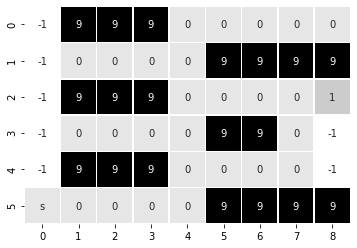

In [87]:
grid1a = np.array(grid1,dtype = str)
grid1a[8][init_colmn1] = 's'
grid1a_r = np.rot90(grid1a, -1)
grid1_r = np.rot90(grid1, -1)
sns.heatmap(grid1_r,annot=grid1a_r, square=True,cbar=False,cmap='gray_r',linewidths=.5, fmt='s')
plt.show()

In [88]:
result_blank = np.array([
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', '']]
    ,dtype = 'U2')
#result_blank[0][2] = 'g1'
#result_blank[8][init_colmn1] = 's1'
result_blank_r = np.rot90(result_blank, -1)

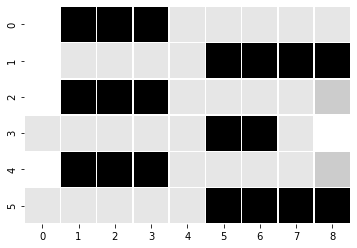

In [89]:
grid0a = np.array(grid0,dtype = str)
grid0a[8][init_colmn1] = 's'
grid0a_r = np.rot90(grid0a, -1)
grid0_r = np.rot90(grid0, -1)
sns.heatmap(grid0_r,annot=result_blank_r, square=True,cbar=False,cmap='gray_r',linewidths=.5, fmt='s')
plt.show()

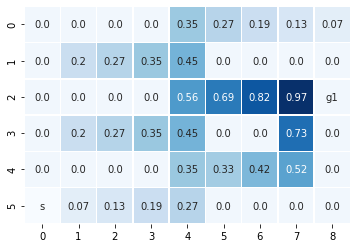

In [90]:
result1a = np.array(np.round(result1,2),dtype = str)
result1a[0][2] = 'g1'
result1a[8][init_colmn1] = 's'
result1_r = np.rot90(result1, -1)
result1a_r = np.rot90(result1a, -1)
sns.heatmap(result1_r,annot=result1a_r, square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
plt.show()

# Assembly function

In [91]:
def product(i, new_prod):
    init_product = 1
    discount = 0.3
    product_list = np.ones((init_product, 1))
    
    # use product
    for _ in range(0, int(np.floor(discount*i))):
        if init_product > _:
            product_list[_][0] += -1

    # stock new product
    for _ in range(init_product, 0, -1):
        if product_list[_-1][0] < 0.1:
            product_list[_-1][0] += new_prod
            new_prod = 0
    return product_list

In [92]:
def product2(i, new_prod):
    init_product = 3
    discount = 0.1
    product_list = np.ones((init_product, 1))
    
    # use product
    for _ in range(0, int(np.floor(discount*i))):
        if init_product > _:
            product_list[_][0] += -1

    # stock new product
    for _ in range(init_product, 0, -1):
        if product_list[_-1][0] < 0.1:
            product_list[_-1][0] += new_prod
            new_prod = 0
    return product_list

[[1.]]


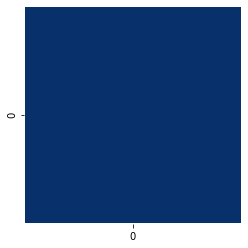

In [93]:
product_list = product(0, 1)
print(product_list)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
plt.show()

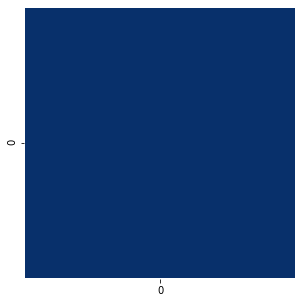

In [94]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = list(range(50))

def plot(i, locs):
    ax.clear()  # 図をクリア
    product_list = product(i, 0)
    sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    #plt.plot(8-path1[i][0]+0.5,path1[i][1]+0.5, 'o', markersize=20, color='r',alpha=0.7)    

anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=False)
#anim.save('prod1.mp4', writer='ffmpeg')
#anim.save('prod1.gif', writer='pillow')
HTML(anim.to_jshtml())
plt.show()

[[1.]]


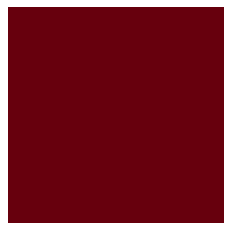

In [95]:
product_list = product(0, 1)
print(product_list)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Reds',linewidths=.5, fmt='s', xticklabels=False, yticklabels=False)
plt.show()

[[1.]]


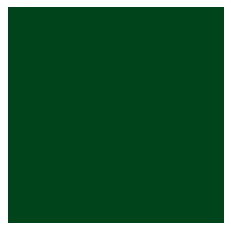

In [96]:
product_list = product(0, 1)
print(product_list)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Greens',linewidths=.5, fmt='s', xticklabels=False, yticklabels=False)
plt.show()

# 図の配置テスト

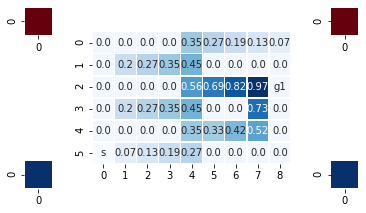

In [97]:
ax1 = plt.subplot2grid((3,10),(0,0))
ax2 = plt.subplot2grid((3,10),(2,0))
ax3 = plt.subplot2grid((3,10),(0,9))
ax4 = plt.subplot2grid((3,10),(2,9))
ax_map = plt.subplot2grid((3,10),(0,2),colspan=6 ,rowspan=3)

sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Reds',linewidths=.5, fmt='s', ax=ax1)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax2)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Reds',linewidths=.5, fmt='s', ax=ax3)
sns.heatmap(result1_r,annot=result1a_r, square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax_map)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax4)
plt.show()

product test End

In [98]:
# RL2, Agent2 Learning
init_colmn2 = 3
env2 = Environment(grid2, move_prob=move_prob, init_colmn=init_colmn2)
planner2 = ValueIterationPlanner(env2)
result2 = planner2.plan()

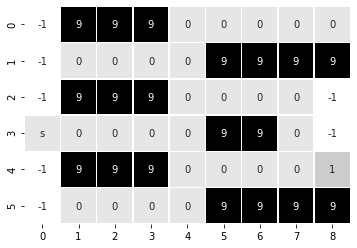

In [99]:
grid2a = np.array(grid2,dtype = str)
grid2a[8][init_colmn2] = 's'
grid2_r = np.rot90(grid2, -1)
grid2a_r = np.rot90(grid2a, -1)
sns.heatmap(grid2_r,annot=grid2a_r, square=True,cbar=False,cmap='gray_r',linewidths=.5, fmt='s')
plt.show()

In [100]:
result_blank = np.array([
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', '']]
    ,dtype = 'U2')
result_blank[0][2] = 'g1'
result_blank[8][init_colmn1] = 's1'
result_blank_r = np.rot90(result_blank, -1)

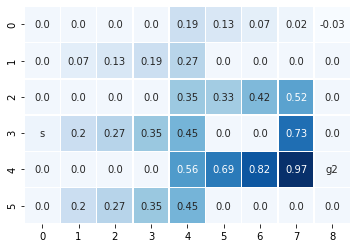

In [101]:
result2a = np.array(np.round(result2,2),dtype = str)
result2a[0][4] = 'g2'
result2a[8][init_colmn2] = 's'
result2_r = np.rot90(result2, -1)
result2a_r = np.rot90(result2a, -1)
sns.heatmap(result2_r,annot=result2a_r, square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
plt.show()

In [102]:
# Path Planning, Agent1
print('Agent1', 'Non-Negotiated path', 'Utility value')
path1, u_v1 = p_gene(env1, result1, start=[8, 5], goal=[0, 2])
print(path1)
print(u_v1)

Agent1 Non-Negotiated path Utility value
[[8, 5], [7, 5], [6, 5], [5, 5], [4, 5], [4, 4], [4, 3], [4, 2], [3, 2], [2, 2], [1, 2], [0, 2]]
[-1, 0.07031698398065221, 0.12838080972140264, 0.19361300882415813, 0.2668985657145631, 0.35330314200604745, 0.4474518069758938, 0.5572491854071359, 0.6876278059761164, 0.8219028437512576, 0.9727550466835895, 1.0, 0.0, 0]


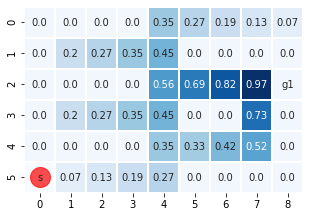

In [103]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = list(range(len(path1)))

def plot(i, locs):
    ax.clear()  # 図をクリア
    sns.heatmap(result1_r,annot=result1a_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    # plt.plot(path1[i][1]+0.5,path1[i][0]+0.5, 'o', markersize=20, color='r',alpha=0.7)
    plt.plot(8-path1[i][0]+0.5,path1[i][1]+0.5, 'o', markersize=20, color='r',alpha=0.7)    

# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
anim.save('agent1_value.mp4', writer='ffmpeg')
anim.save('agent1_value.gif', writer='pillow')
HTML(anim.to_jshtml())

# Factory Simulation

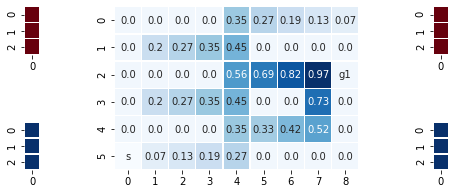

In [17]:
fig = plt.subplots(figsize=(8, 3))
ax1 = plt.subplot2grid((3,10),(0,0))
ax2 = plt.subplot2grid((3,10),(2,0))
ax3 = plt.subplot2grid((3,10),(0,9))
ax4 = plt.subplot2grid((3,10),(2,9))
ax_map = plt.subplot2grid((3,10),(0,2),colspan=6 ,rowspan=3)

sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Reds',linewidths=.5, fmt='s', ax=ax1)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax2)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Reds',linewidths=.5, fmt='s', ax=ax3)
sns.heatmap(result1_r,annot=result1a_r, square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax_map)
sns.heatmap(product_list,square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax4)
plt.show()

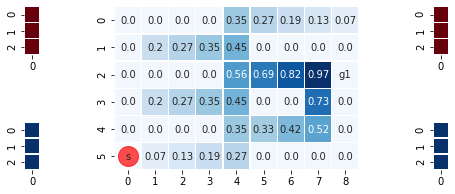

In [18]:
fig, ax = plt.subplots(figsize=(8, 3))
ax1 = plt.subplot2grid((3,10),(0,0))
ax2 = plt.subplot2grid((3,10),(2,0))
ax3 = plt.subplot2grid((3,10),(0,9))
ax4 = plt.subplot2grid((3,10),(2,9))
ax_map = plt.subplot2grid((3,10),(0,2),colspan=6 ,rowspan=3)
locs = list(range(len(path1)))

def plot(i, locs):
    ax_map.clear()  # 図をクリア
    sns.heatmap(result1_r,annot=result1a_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s',ax=ax_map)
    ax_map.plot(8-path1[i][0]+0.5,path1[i][1]+0.5, 'o', markersize=20, color='r',alpha=0.7)
    sns.heatmap(product2(i, 1),square=True,vmin = 0,vmax = 1,cbar=False,cmap='Reds',linewidths=.5, fmt='s', ax=ax1)
    sns.heatmap(product2(i, 1),square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax2)
    sns.heatmap(product(i, 0),square=True,vmin = 0,vmax = 1,cbar=False,cmap='Reds',linewidths=.5, fmt='s', ax=ax3)
    sns.heatmap(product2(i, 0),square=True,vmin = 0,vmax = 1,cbar=False,cmap='Blues',linewidths=.5, fmt='s', ax=ax4)

# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
#anim.save('AGVinFactory.mp4', writer='ffmpeg')
#anim.save('AGVinFactory.gif', writer='pillow')
HTML(anim.to_jshtml())

End test

In [19]:
result_blank = np.array([
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', '']]
    ,dtype = 'U2')
result_blank[0][2] = 'g1'
result_blank[8][init_colmn1] = 's1'
result_blank_r = np.rot90(result_blank, -1)

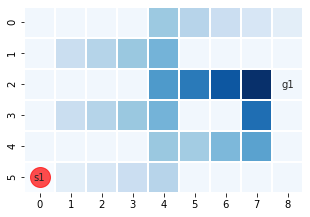

In [20]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = list(range(len(path1)))
def plot(i, locs):
    ax.clear()  # 図をクリア
    sns.heatmap(result1_r,annot=result_blank_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    #plt.plot(path1[i][1]+0.5,path1[i][0]+0.5, 'o', markersize=20, color='r',alpha=0.7)
    plt.plot(8-path1[i][0]+0.5,path1[i][1]+0.5,'o', markersize=20, color='r',alpha=0.7)    

# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
anim.save('agent1.mp4', writer='ffmpeg')
anim.save('agent1.gif', writer='pillow')
HTML(anim.to_jshtml())

In [21]:
result_blank = np.array([
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', ''],
    ['', '', '', '', '', '']]
    ,dtype = 'U2')
result_blank[0][4] = 'g2'
result_blank[8][init_colmn2] = 's2'
result_blank_r = np.rot90(result_blank, -1)

In [22]:
# Path Planning, Agent2
print('Agent2', 'Non-Negotiated path', 'Utility value')
path2, u_v2 = p_gene(env2, result2, start=[8, 3], goal=[0, 4])
print(path2)
print(u_v2)

Agent2 Non-Negotiated path Utility value
[[8, 3], [7, 3], [6, 3], [5, 3], [4, 3], [4, 4], [3, 4], [2, 4], [1, 4], [0, 4]]
[-1, 0.1976485770007049, 0.2714323519491828, 0.35432523491240814, 0.44745180712802907, 0.557249185482463, 0.6876278059764698, 0.8219028437513431, 0.9727550466836079, 1.0, 0.0, 0]


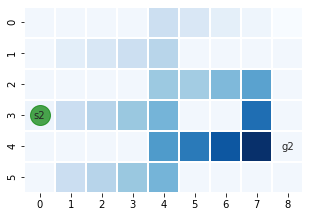

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = list(range(len(path2)))
#locs = list(range(6))
def plot(i, locs):
    ax.clear()  # 図をクリア
    sns.heatmap(result2_r,annot=result_blank_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    #plt.plot(path2[i][1]+0.5,path2[i][0]+0.5, 'o', markersize=20, color='g',alpha=0.7)
    plt.plot(8-path2[i][0]+0.5,path2[i][1]+0.5, 'o', markersize=20, color='g',alpha=0.7)
    
# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
anim.save('agent2.mp4', writer='ffmpeg')
anim.save('agent2.gif', writer='pillow')
HTML(anim.to_jshtml())

In [24]:
result_blank[0][2] = 'g1'
result_blank[8][init_colmn1] = 's1'

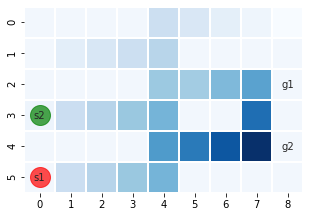

In [25]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = max(list(range(len(path1))), list(range(len(path2))))

def plot(i, locs):
    ax.clear()  # 図をクリア
    sns.heatmap(result2_r,annot=result_blank_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    if i < len(path1):
        plt.plot(8-path1[i][0]+0.5,path1[i][1]+0.5, 'o', markersize=20, color='r',alpha=0.7)
    if i < len(path2):
        plt.plot(8-path2[i][0]+0.5,path2[i][1]+0.5, 'o', markersize=20, color='g',alpha=0.7)
    
# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
anim.save('agent_original.mp4', writer='ffmpeg')
anim.save('agent_original.gif', writer='pillow')
HTML(anim.to_jshtml())

In [26]:
# Conflict check
conf_path = conflict(path1, path2)
if conf_path == None: conf_path = [-1, -1]
print('Blockd point:', conf_path)
print('Agent1 state and value:', path1.index(conf_path), u_v1[path1.index(conf_path)])
print('Agent2 state and value:', path2.index(conf_path), u_v2[path2.index(conf_path)])

Blockd point: [4, 4]
Agent1 state and value: 5 0.35330314200604745
Agent2 state and value: 5 0.557249185482463


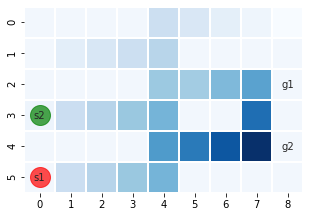

In [27]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = list(range(path1.index(conf_path)+1))

def plot(i, locs):
    ax.clear()  # 図をクリア
    sns.heatmap(result2_r,annot=result_blank_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    if i < len(path1):
        plt.plot(8-path1[i][0]+0.5,path1[i][1]+0.5, 'o', markersize=20, color='r',alpha=0.7)
    if i < len(path2):
        plt.plot(8-path2[i][0]+0.5,path2[i][1]+0.5, 'o', markersize=20, color='g',alpha=0.7)

# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
anim.save('agent_block.mp4', writer='ffmpeg')
anim.save('agent_block.gif', writer='pillow')
HTML(anim.to_jshtml())

In [28]:
# Path Negotiated, Agent2
print('Agent2', 'Blocked path', 'Utility value')
path2b, u_v2b = p_gene(env2, result2, start=[8, 3], goal=[0, 4], block=conf_path)
print(path2b)
print(u_v2b)
print('Agent2 new value:', u_v2b[path2.index(conf_path)])
u2_diff = u_v2[path2.index(conf_path)] - u_v2b[path2.index(conf_path)]
print('Utility2 diff:', u2_diff)

Agent2 Blocked path Utility value
[[8, 3], [7, 3], [6, 3], [5, 3], [4, 3], [4, 2], [3, 2], [2, 2], [1, 2], [1, 3], [1, 4], [0, 4]]
[-1, 0.1976485770007049, 0.2714323519491828, 0.35432523491240814, 0.44745180712802907, 0.35330314214220127, 0.33263415551325115, 0.423082816687973, 0.5246979792421383, 0.7329126573965676, 0.9727550466836079, 1.0, 0.0, 0]
Agent2 new value: 0.35330314214220127
Utility2 diff: 0.20394604334026178


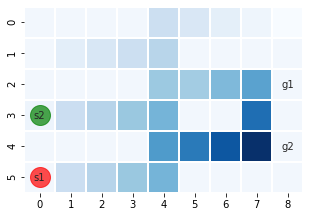

In [29]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = max(list(range(len(path1))), list(range(len(path2b))))
def plot(i, locs):
    ax.clear()  # 図をクリア
    sns.heatmap(result2_r,annot=result_blank_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    if i < len(path1):
        plt.plot(8-path1[i][0]+0.5,path1[i][1]+0.5, 'o', markersize=20, color='r',alpha=0.7)
    if i < len(path2b):
        plt.plot(8-path2b[i][0]+0.5,path2b[i][1]+0.5, 'o', markersize=20, color='g',alpha=0.7)

# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
anim.save('agent_sc1.mp4', writer='ffmpeg')
anim.save('agent_sc1.gif', writer='pillow')
HTML(anim.to_jshtml())

In [30]:
# Path Negotiated, Agent1
print('Agent1', 'Blocked path', 'Utility value')
path1b = copy.deepcopy(path1)
path1b.insert(path1.index(conf_path), path1[path1.index(conf_path)-1])
u_v1b = u_v1
print(path1b)
print(u_v1b)
print(u_v1[path1.index(conf_path)], u_v1[path1.index(conf_path)-1])
u1_diff = u_v1[path1.index(conf_path)] - u_v1[path1.index(conf_path)-1]
print('Utility1 diff:', u1_diff)

Agent1 Blocked path Utility value
[[8, 5], [7, 5], [6, 5], [5, 5], [4, 5], [4, 5], [4, 4], [4, 3], [4, 2], [3, 2], [2, 2], [1, 2], [0, 2]]
[-1, 0.07031698398065221, 0.12838080972140264, 0.19361300882415813, 0.2668985657145631, 0.35330314200604745, 0.4474518069758938, 0.5572491854071359, 0.6876278059761164, 0.8219028437512576, 0.9727550466835895, 1.0, 0.0, 0]
0.35330314200604745 0.2668985657145631
Utility1 diff: 0.08640457629148435


In [31]:
# Negotiation Range
print('Negotiation:', u1_diff, '< e and e <', u2_diff)

Negotiation: 0.08640457629148435 < e and e < 0.20394604334026178


In [32]:
epsilon = simple_negotiation(u1_diff, u2_diff, 10)
print('Negotiation results:', epsilon)

a2_offer 1 0.08222071169154245
a1_offer 2 0.621436075938911
a2_offer 3 0.09744499570270525
Accept 0.09744499570270525
Negotiation results: 0.09744499570270525


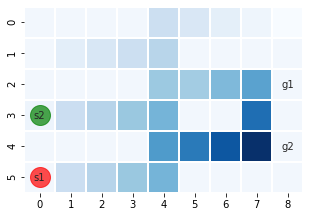

In [33]:
fig, ax = plt.subplots(figsize=(5, 5))
locs = max(list(range(len(path2))),list(range(len(path1b))))
def plot(i, locs):
    ax.clear()  # 図をクリア
    sns.heatmap(result2_r,annot=result_blank_r,square=True,cbar=False,cmap='Blues',linewidths=.5, fmt='s')
    if i < len(path1b):
        plt.plot(8-path1b[i][0]+0.5,path1b[i][1]+0.5, 'o', markersize=20, color='r', alpha=0.7)
    if i < len(path2):
        plt.plot(8-path2[i][0]+0.5,path2[i][1]+0.5, 'o', markersize=20, color='g',alpha=0.7)

# 16枚のプロットを 1000ms ごとに表示
anim = FuncAnimation(fig, plot, frames=len(locs), fargs=(locs,), repeat=True)
anim.save('agent_sc2.mp4', writer='ffmpeg')
anim.save('agent_sc2.gif', writer='pillow')
HTML(anim.to_jshtml())

End